In [12]:
import pandas as pd

fruit_data = pd.read_table("/Users/wirat/Downloads/fruit_data_with_colors.txt")

In [13]:
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [14]:
print(fruit_data.shape)

(59, 7)


In [15]:
print(fruit_data['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [16]:
print(fruit_data.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [17]:
X = fruit_data[['height', 'width', 'mass', 'color_score']]
y = fruit_data['fruit_label']

In [18]:
X.head()

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59
2,7.2,7.4,176,0.60
3,4.7,6.2,86,0.80
4,4.6,6.0,84,0.79


In [19]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=0, test_size=0.25)

In [25]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of y_train: {}".format(y_train.shape))
print("Size of y_test: {}".format(y_test.shape))

Size of X_train: (44, 4)
Size of X_test: (15, 4)
Size of y_train: (44,)
Size of y_test: (15,)


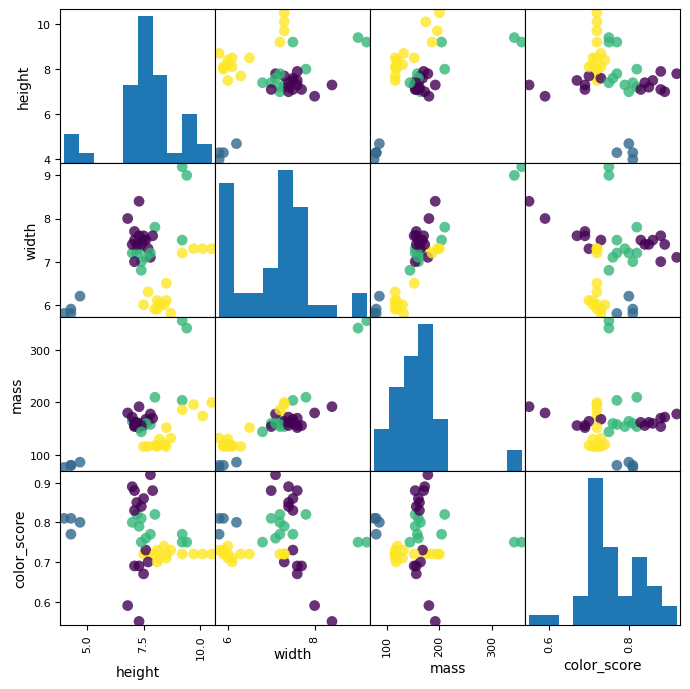

In [28]:
from pandas.plotting import scatter_matrix

fruit_plot = scatter_matrix(X_train, c=y_train, figsize=(8, 8), marker='o', s=60, alpha=0.8)

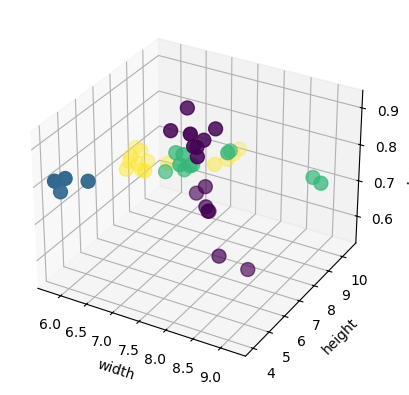

In [10]:
# plotting a 3D scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()


In [11]:
X_train.shape

(44, 4)

In [12]:
y_train.shape

(44,)

In [13]:
X_test.shape

(15, 4)

In [14]:
y_test.shape

(15,)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [56]:
knn.score(X_test, y_test)

0.6

In [45]:
lookup_fruit_name = dict(zip(fruit_data.fruit_label.unique(), fruit_data.fruit_name.unique())) 
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [46]:
# first example: a small fruit with height 5.5 cm, width 4.3 cm, mass 20g, color 0.9
fruit_prediction = knn.predict([[5.5, 4.3, 20, 0.9]])
print(lookup_fruit_name[fruit_prediction[0]])

mandarin


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [47]:
# second example: a larger, elongated fruit with height 8.5 cm, width 6.3 cm, mass 100g, color 0.5  
fruit_prediction = knn.predict([[8.5, 6.3, 100,  0.5]])
print(lookup_fruit_name[fruit_prediction[0]])

lemon


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


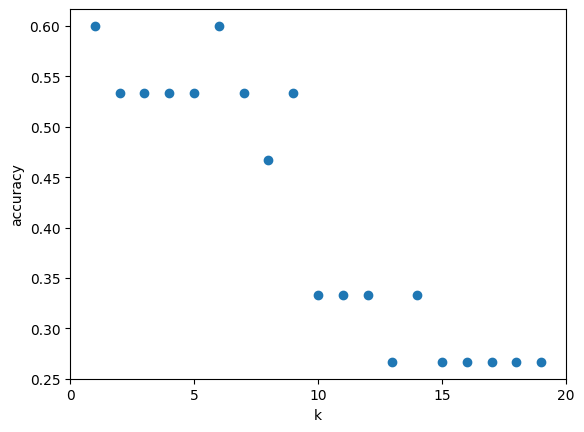

In [21]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);